In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pandas Assignment Part 1

loading the datasets

In [128]:
ds0 =pd.read_csv('states0.csv')
ds1 =pd.read_csv('states1.csv')
ds2 =pd.read_csv('states2.csv')
ds3 =pd.read_csv('states3.csv')
ds4 =pd.read_csv('states4.csv')
ds5 =pd.read_csv('states5.csv')
ds6 =pd.read_csv('states6.csv')
ds7 =pd.read_csv('states7.csv')
ds8 =pd.read_csv('states8.csv')
ds9 =pd.read_csv('states9.csv')


In [129]:
ds0.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [130]:
ds1.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
1,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,$76146.5605875153,1751607M_1841615F
2,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,$61827.97663551402,448413M_478041F
3,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,$75466.36363636363,306674M_340810F
4,4,Florida,19645772,21.3385426653884%,59.08374880153398%,15.165675934803444%,0.2104506232023015%,2.2831735378715257%,0.05151006711409391%,$50690.194986743794,9600009M_10045763F


In [131]:
ds2.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Georgia,10006693,8.418242207460397%,54.28630556974962%,32.08829841594277%,0.18758303525804798%,3.0976494634644895%,0.046601941747572824%,$50811.08205128205,4883331M_5123362F
1,1,Hawaii,1406299,9.186708860759486%,25.032278481012657%,2.052848101265823%,0.1449367088607596%,36.59208860759495%,8.758860759493672%,$73264.42628205128,709871M_696428F
2,2,Idaho,1616547,11.505369127516781%,83.1362416107383%,0.5667785234899323%,1.468120805369128%,1.135906040268457%,0.1271812080536914%,$48017.31543624161,810464M_806083F
3,3,Illinois,12873761,15.601733547351516%,60.85980738362764%,17.108410914927717%,0.11842696629213499%,4.475377207062604%,0.02003210272873195%,$59587.04887459807,6316899M_6556862F
4,4,Indiana,6568645,6.536744186046501%,78.43189368770771%,11.18697674418606%,0.1940863787375415%,1.5782724252491687%,0.03262458471760798%,$48616.22784810127,3235263M_3333382F


In [132]:
ds9.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Utah,2903379,13.468376068376063%,79.40683760683764%,1.0179487179487194%,1.0813675213675222%,2.196068376068376%,0.8259829059829059%,$63488.91780821918,1459229M_1444150F
1,1,Vermont,626604,1.6092896174863391%,93.98306010928961%,0.9808743169398909%,0.301639344262295%,1.2387978142076501%,0.03060109289617486%,$55602.96721311475,308573M_318031F
2,2,Virginia,8256630,8.0110164981373%,63.271048430015945%,20.17599787120807%,0.21245343267695582%,5.455242150079845%,0.06471527408195847%,$72866.01341201717,4060948M_4195682F
3,3,Washington,6985464,11.140968858131506%,72.03840830449816%,3.384429065743947%,1.4107266435986163%,7.022006920415224%,0.609896193771627%,$64493.76768377254,3487725M_3497739F
4,4,West Virginia,1851420,1.290909090909089%,92.17623966942146%,3.6628099173553723%,0.15268595041322316%,0.6824380165289253%,0.02644628099173554%,$41437.11157024794,913631M_937789F


# 1.
The csv(s) have  state, total population, the different ethnicities as columns, income and Gender . And on rows we have the data for the for the different states according to the total population and the different ethnicites

# 2. 
making a single us_census DataFrame

In [133]:
import glob

all_files= sorted(glob.glob('states*.csv'))

In [134]:
us_census= pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

In [135]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [136]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [137]:
us_census.dtypes

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

We have two different dtypesm int64 and object. We could convert all dtypes that show the data of into float64 , that would help us work with data more easily. Furthermore, we can split the data in gender column into males and females columns

# 4. 

* cheking the dataframe


In [138]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


* first i'm going to convert the TotalPop column from int to float
* next, i'm going to strip the '%' from the Hispanic to Asian columns , and then convert them to float
* next, i'm going to fill the NaN values in Pacific column and convert that to float
* Then, i will strip '$' sign from income, and convert that into float
* Finally, i'm going to split the gender column into Men and Women and convert them to float as well.

In [139]:
us_census['TotalPop'] = us_census['TotalPop'].astype(float)

In [140]:
collist = us_census.columns.to_list()

In [141]:
for col in collist[3:-3]:
  us_census[col] = us_census[col].str.rstrip('%').astype('float')/100

# 5. 

here i'm removing the '$' sign from the Income column and converting the income column into float

In [142]:
us_census['Income'] = us_census['Income'].replace({'\$':''}, regex = True).astype(float)

In [143]:
del us_census['Unnamed: 0']

# 6. 

In [144]:
us_census[['Men','Women']] = us_census.GenderPop.str.split("_",expand=True,)
del us_census['GenderPop']

In [145]:
us_census['Men'] = us_census['Men'].str.rstrip('M').astype('float')

here, i encountered a problem where the Number of Men were given but not Women. So i'm going to first remove the 'F', then fill the blank space with NaN values, then fill the NaN values by getting the difference between the TotalPop and Men to get the number of Women

removing the 'F'

In [146]:
us_census['Women'] = us_census['Women'].str.rstrip('F')

replacing the blank space with the difference of the TotalPop and Men

In [147]:
us_census['Women'] = us_census['TotalPop'] - us_census['Men']

# 7. 

converted both columns to float

# 8. 

In [148]:
us_census['Pacific'] = us_census['Pacific'].fillna(method='ffill')

In [149]:
us_census['Pacific'] =us_census['Pacific'].str.rstrip('%').astype('float')/100

# 9.



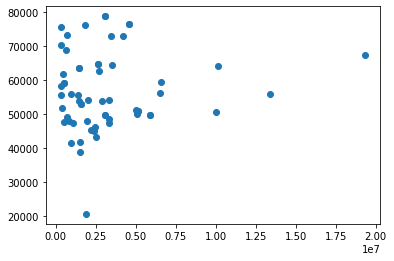

In [150]:
plt.scatter(us_census['Women'], us_census['Income'])
plt.show() 

# 10. 

In [151]:
us_census.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17    False
18     True
19    False
20    False
21    False
22    False
23    False
24     True
25    False
26    False
27    False
28    False
29    False
30     True
31    False
32    False
33    False
34    False
35    False
36     True
37    False
38    False
39    False
40    False
41    False
42     True
43    False
44    False
45    False
46    False
47    False
48     True
49    False
50    False
51    False
52    False
53    False
54     True
55    False
56    False
57    False
58    False
59    False
dtype: bool

# 11. 

In [152]:
us_census.drop_duplicates()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Men,Women
0,Alabama,4830620.0,0.037516,0.618787,0.312530,0.004532,0.010503,0.000344,43296.358603,2341093.0,2489527.0
1,Alaska,733375.0,0.059096,0.609102,0.028485,0.163910,0.054503,0.010587,70354.743902,384160.0,349215.0
2,Arizona,6641928.0,0.295659,0.571200,0.038510,0.043551,0.028766,0.001676,54207.820955,3299088.0,3342840.0
3,Arkansas,2958208.0,0.062155,0.711378,0.189688,0.005229,0.011423,0.001469,41935.633968,1451913.0,1506295.0
4,California,38421464.0,0.372919,0.402158,0.056774,0.004053,0.130522,0.003514,67264.782303,19087135.0,19334329.0
5,Colorado,5278906.0,0.207844,0.698956,0.035464,0.005738,0.026620,0.003514,64657.801787,2648667.0,2630239.0
7,Connecticut,3593222.0,0.156048,0.676771,0.103481,0.001262,0.040220,0.000186,76146.560588,1751607.0,1841615.0
8,Delaware,926454.0,0.088248,0.646327,0.207439,0.002598,0.032687,0.000186,61827.976636,448413.0,478041.0
9,District of Columbia,647484.0,0.091659,0.331039,0.517765,0.002006,0.033832,0.000296,75466.363636,306674.0,340810.0
10,Florida,19645772.0,0.213385,0.590837,0.151657,0.002105,0.022832,0.000515,50690.194987,9600009.0,10045763.0


# 12.

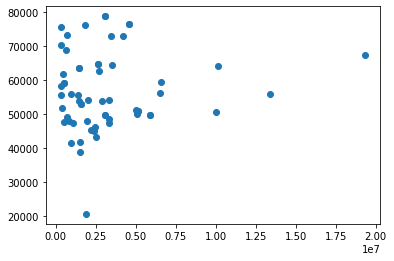

In [153]:
plt.scatter(us_census['Women'], us_census['Income'])
plt.show() 


# 13.

In [154]:
print(us_census.columns)

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'Men', 'Women'],
      dtype='object')


There are Hispanic, White, Black, Native, Asian and Pacific races in the dataset

# 14. 

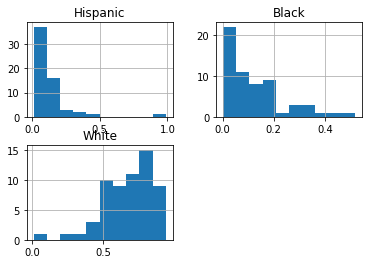

In [155]:
hist1 = us_census.hist(column=['Hispanic','Black','White'])

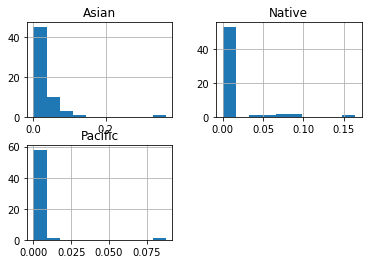

In [156]:
hist2 = us_census.hist(column=['Asian','Native','Pacific'])

# 15. 

The real power of Pandas and Python over Excel are fast and efficient operations even when you have a larger dataset. While Excel may begin to slow down after a thousand or so rows, Pandas has no such limit

Here are a few charts that show the distribution of a particular ethnicity over the different states.. and the break down of ethnicities in a particular state


## Bar charts of a particular ethnicities distribution in different states

* Distribution of Hispanics over the different states

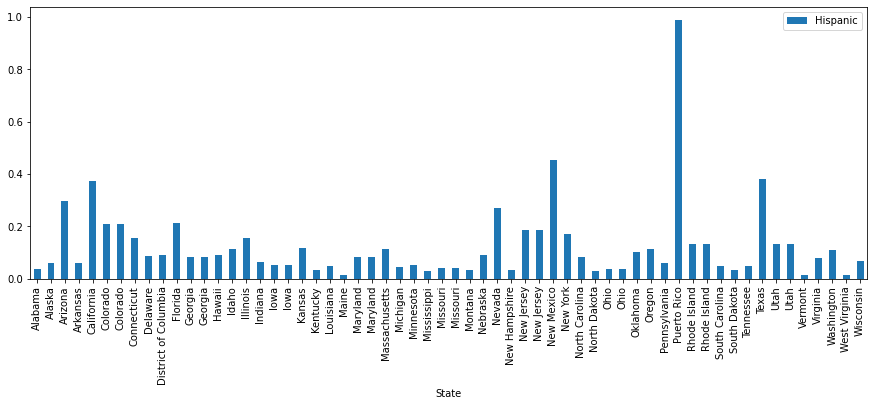

In [157]:
us_census.plot.bar(x='State', y='Hispanic', figsize=(15,5))

* Distribution of Blacks over different states


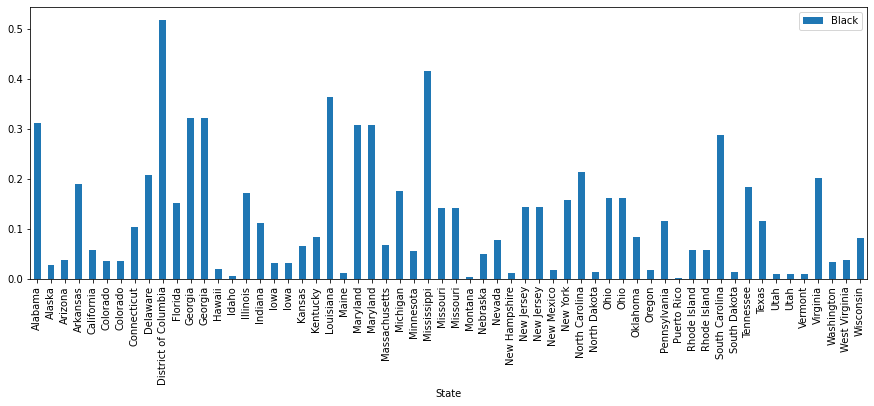

In [158]:
us_census.plot.bar(x='State', y='Black', figsize=(15,5))

* Distribution of Asian over different states

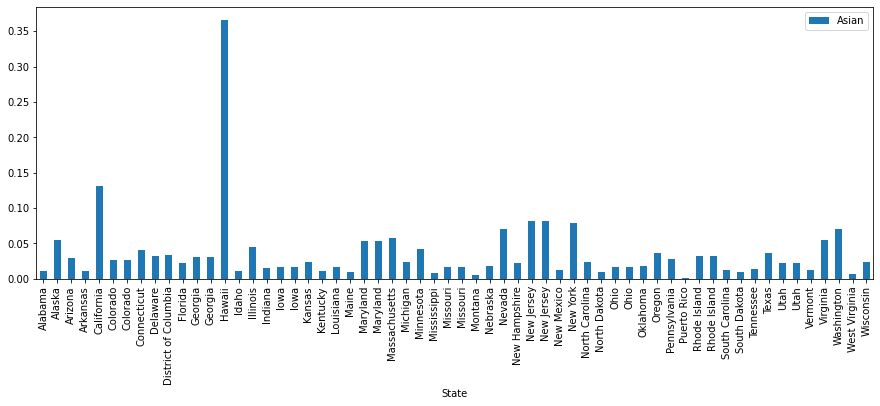

In [159]:
us_census.plot.bar(x='State', y='Asian', figsize=(15,5))

NOw, since we don't have the data for the remaining percentage of other smaller ethnicities, We have to calculate it and add another column for all other types of ethnicities numbers, so that we can plot the pie chart

In [160]:
us_census['Other'] = us_census.apply(lambda row: 1-(row.Hispanic + row.White + row.Black+ row.Asian + row.Native + row.Pacific), axis=1)

In [161]:
us_census= us_census[['State','TotalPop','Hispanic','White','Black','Native','Asian','Pacific','Other','Income','Men',"Women"]]

In [162]:
us_census.drop_duplicates()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Other,Income,Men,Women
0,Alabama,4830620.0,0.037516,0.618787,0.312530,0.004532,0.010503,0.000344,0.015789,43296.358603,2341093.0,2489527.0
1,Alaska,733375.0,0.059096,0.609102,0.028485,0.163910,0.054503,0.010587,0.074317,70354.743902,384160.0,349215.0
2,Arizona,6641928.0,0.295659,0.571200,0.038510,0.043551,0.028766,0.001676,0.020638,54207.820955,3299088.0,3342840.0
3,Arkansas,2958208.0,0.062155,0.711378,0.189688,0.005229,0.011423,0.001469,0.018658,41935.633968,1451913.0,1506295.0
4,California,38421464.0,0.372919,0.402158,0.056774,0.004053,0.130522,0.003514,0.030060,67264.782303,19087135.0,19334329.0
5,Colorado,5278906.0,0.207844,0.698956,0.035464,0.005738,0.026620,0.003514,0.021864,64657.801787,2648667.0,2630239.0
7,Connecticut,3593222.0,0.156048,0.676771,0.103481,0.001262,0.040220,0.000186,0.022033,76146.560588,1751607.0,1841615.0
8,Delaware,926454.0,0.088248,0.646327,0.207439,0.002598,0.032687,0.000186,0.022515,61827.976636,448413.0,478041.0
9,District of Columbia,647484.0,0.091659,0.331039,0.517765,0.002006,0.033832,0.000296,0.023402,75466.363636,306674.0,340810.0
10,Florida,19645772.0,0.213385,0.590837,0.151657,0.002105,0.022832,0.000515,0.018669,50690.194987,9600009.0,10045763.0


## Pie Chart showing distribution ethnicities in California, Texas and District of Columbia

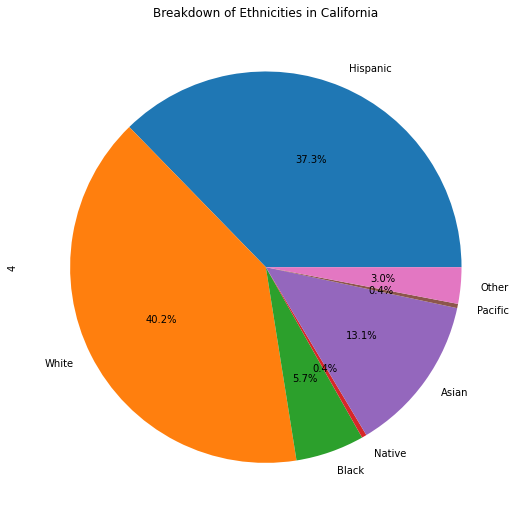

In [163]:
us_census.iloc[4,2:9].plot.pie(title='Breakdown of Ethnicities in California',autopct='%1.1f%%', figsize=(9,9))

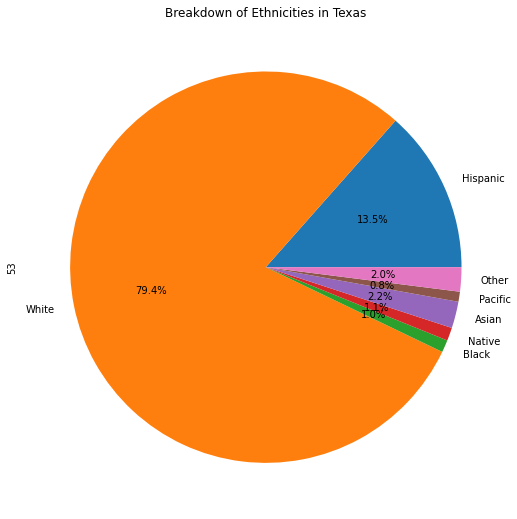

In [164]:
us_census.iloc[53,2:9].plot.pie(title='Breakdown of Ethnicities in Texas',autopct='%1.1f%%', figsize=(9,9))

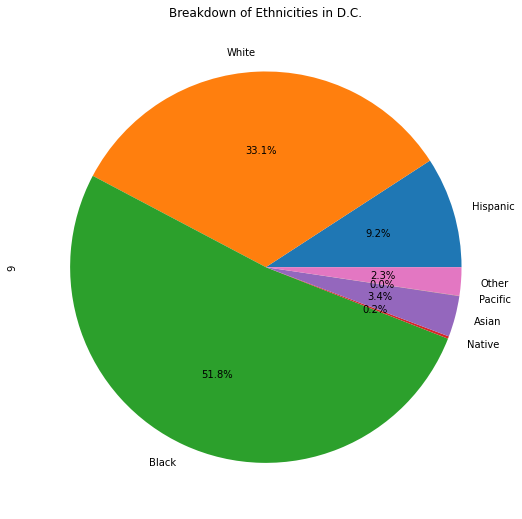

In [165]:
us_census.iloc[9,2:9].plot.pie(title='Breakdown of Ethnicities in D.C.',autopct='%1.1f%%', figsize=(9,9))

# Pandas Assigment Part 2

# 1.

loading the csv

In [166]:
inventory =pd.read_csv('inventory.csv')

# 2.

In [167]:
inventory.head(10)

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


# 3.

In [168]:
staten_island= inventory.loc[inventory['location']== 'Staten Island']

# 4.

In [169]:
product_request = staten_island['product_description']

# 5.

In [170]:
seed_request = inventory.loc[(inventory['location'] == 'Brooklyn') & (inventory['product_type'] == 'seeds')]

# 6. 

In [172]:
inventory['in_stock'] = np.where(inventory['quantity']>0, True, False)

# 7.

In [176]:
inventory['total_value'] = inventory.apply(lambda row: row.quantity * row.price, axis=1)

# 8.

In [180]:
combine_lambda = lambda row: '{} - {}'.format(row.product_type,row.product_description)

# 9.

In [181]:
inventory['full_description'] = inventory.apply(combine_lambda ,axis=1)

In [183]:
inventory

,location,product_type,product_description,quantity,price,in_stock,total_value,full_description
0,Staten Island,seeds,daisy,4,6.99,True,27.96,seeds - daisy
1,Staten Island,seeds,calla lily,46,19.99,True,919.54,seeds - calla lily
2,Staten Island,seeds,tomato,85,13.99,True,1189.15,seeds - tomato
3,Staten Island,garden tools,rake,4,13.99,True,55.96,garden tools - rake
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00,garden tools - wheelbarrow
5,Staten Island,garden tools,spade,93,19.99,True,1859.07,garden tools - spade
6,Staten Island,pest_control,insect killer,74,12.99,True,961.26,pest_control - insect killer
7,Staten Island,pest_control,weed killer,8,23.99,True,191.92,pest_control - weed killer
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False,0.00,planter - 20 inch terracotta planter
9,Staten Island,planter,8 inch plastic planter,53,3.99,True,211.47,planter - 8 inch plastic planter
